![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/69450217-6cee2780-0d3b-11ea-947b-461ea407da85.jpg"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>

### Project

# New York City Airbnb Open Data

Let's put in practice the topics covered in the course and analyze Airbnb listings data.

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Hands on! 

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Read the `airbnb_data` dataset into a `airbnb_df` DataFrame variable.

This data file includes all needed information to find out more about hosts and geographical availability.

This public dataset is part of Airbnb, and the original source can be found on this [website](http://insideairbnb.com/).

Here's a preview of that file:

In [38]:
!head data/airbnb_data.csv

listing_id,listing_name,host_id,host_name,neighbourhood_group,lat_lon,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2539,Clean & quiet apt home by the park,2787,John,"Kensington, Brooklyn",40.64749;-73.97237,Private room,"$149,00.-",1,9,19/10/18,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,"Midtown, Manhattan",40.75362;-73.98377,Entire home/apt,"$225,00.-",1,45,21/5/19,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,"Harlem, Manhattan",40.80902;-73.9419,Private room,"$150,00.-",3,0,,,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,"Clinton Hill, Brooklyn",40.68514;-73.95976,Entire home/apt,"$89,00.-",1,270,5/7/19,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,"East Harlem, Manhattan",40.79851;-73.94399,Entire home/apt,"$80,00.-",10,9,19/11/18,0.1,1,0
5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,"Murray Hill, Manhattan",40.74767

The column names are taken from the original documentation for this dataset.

In [39]:
airbnb_df = pd.read_csv("data/airbnb_data.csv")
airbnb_df.head()

,listing_id,listing_name,host_id,host_name,neighbourhood_group,lat_lon,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,"Kensington, Brooklyn",40.64749;-73.97237,Private room,"$149,00.-",1,9,19/10/18,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,"Midtown, Manhattan",40.75362;-73.98377,Entire home/apt,"$225,00.-",1,45,21/5/19,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,"Harlem, Manhattan",40.80902;-73.9419,Private room,"$150,00.-",3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,"Clinton Hill, Brooklyn",40.68514;-73.95976,Entire home/apt,"$89,00.-",1,270,5/7/19,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,"East Harlem, Manhattan",40.79851;-73.94399,Entire home/apt,"$80,00.-",10,9,19/11/18,0.10,1,0


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Setting `airbnb_data` index.

Set the index of the DataFrame to the `listing_id` column.

In [40]:
airbnb_df.set_index("listing_id",inplace = True)
airbnb_df.head()

,listing_name,host_id,host_name,neighbourhood_group,lat_lon,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
listing_id,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,"Kensington, Brooklyn",40.64749;-73.97237,Private room,"$149,00.-",1,9,19/10/18,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,"Midtown, Manhattan",40.75362;-73.98377,Entire home/apt,"$225,00.-",1,45,21/5/19,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,"Harlem, Manhattan",40.80902;-73.9419,Private room,"$150,00.-",3,0,NaN,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,"Clinton Hill, Brooklyn",40.68514;-73.95976,Entire home/apt,"$89,00.-",1,270,5/7/19,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,"East Harlem, Manhattan",40.79851;-73.94399,Entire home/apt,"$80,00.-",10,9,19/11/18,0.10,1,0


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Checking missing data

We need to check if our `airbnb_data` has any null value. 

To do that, let's create a `percent_missing` Series containing the column names and the percent of missing values per column.

In [41]:
percent_missing = airbnb_df.isna().mean() .round(4)* 100
percent_missing

listing_name                      0.00
host_id                           0.00
host_name                         0.09
neighbourhood_group               0.00
lat_lon                           0.00
room_type                         0.00
price                             0.00
minimum_nights                    0.00
number_of_reviews                 0.00
last_review                       4.06
reviews_per_month                 4.06
calculated_host_listings_count    0.00
availability_365                  0.00
dtype: float64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Dealing with `reviews_per_month` missing values

Impute null values in the `reviews_per_month` column with a `0` value.

In [42]:
airbnb_df["reviews_per_month"].fillna(0,inplace = True)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Dealing with `host_name` missing values

Drop the rows where `host_name` has a missing value.

In [43]:
airbnb_df.dropna(how = "any",subset = ["host_name"],inplace = True)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Dealing with `last_review` missing values

Drop the rows where `last_review` has a missing value.

In [44]:
airbnb_df.dropna(how = "any",subset = ["last_review"],inplace = True)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Dealing with `host_id` invalid values

Drop the rows where `host_id` has a `0` value.

In [45]:
airbnb_df = airbnb_df.loc[airbnb_df["host_id"] != 0]

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Now cast this `last_review` column to `datetime`

In [46]:
airbnb_df["last_review"] = pd.to_datetime(airbnb_df["last_review"])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Duplicated listings

Many listings could be duplicated. Drop all the entries that have the same `listing_name`, `price` and `room_type`. Keep just the last entry.

In [47]:
airbnb_df.drop_duplicates(subset=['listing_name',"price","room_type"],keep = "last",inplace = True)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Invalid `price`

Check the `price`. It should be a numeric type column.

- Remove the `$`, `.` and `-` characters.
- Replace `,` with a `.` character.
- Cast the column to `float` dtype.

In [48]:
airbnb_df["price"] = airbnb_df["price"].str.replace("$","")
airbnb_df["price"] = airbnb_df["price"].str.replace(".","")
airbnb_df["price"] = airbnb_df["price"].str.replace("-","")
airbnb_df["price"] = airbnb_df["price"].str.replace(",",".")
airbnb_df["price"] = airbnb_df["price"].astype(float)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Separating `neighbourhood_group` column

Check the `neighbourhood_group` column. It should be divided into two different columns: `neighbourhood` and `borough`.

After the split, drop the `neighbourhood_group` column.

In [49]:
airbnb_df[["neighbourhood","borough"]] = airbnb_df["neighbourhood_group"].str.split(",",expand = True)
airbnb_df.drop("neighbourhood_group",axis = 1,inplace = True)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Separating `lat_lon` column

Create two new columns `latitude` and `longitude` containing the product of splitting the `lat_lon` column. Both new columns should be casted to `float` dtype.

After the split, drop the `lat_lon` column.

In [50]:
airbnb_df[["latitude","longitude"]] = airbnb_df["lat_lon"].str.split(";-",expand = True)
airbnb_df[["latitude","longitude"]] = airbnb_df[["latitude","longitude"]].astype(float)
airbnb_df.drop("lat_lon",axis = 1,inplace = True)

#### Visualizing points on a map

Let's visualize your `airbnb_df` to confirm everything is in correct format so far.

Execute the below code to visualize the `latitude` and `longitude` you just created.

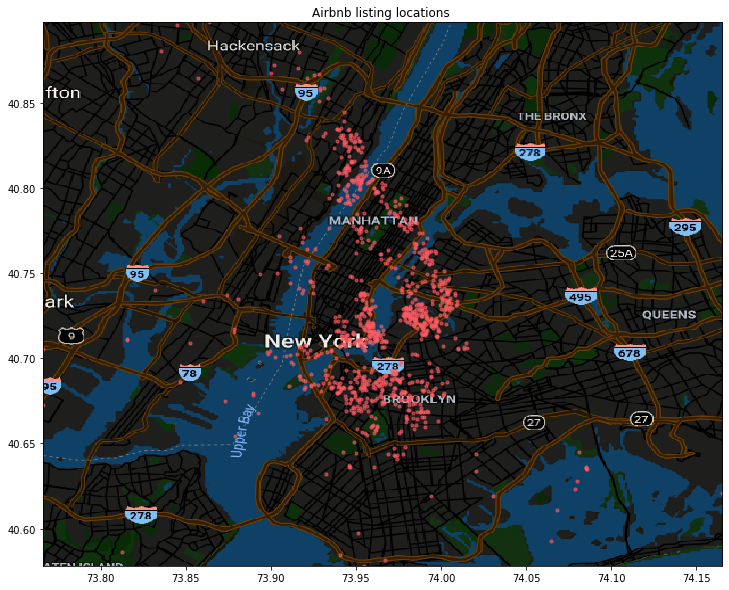

In [51]:
longlat_min_max = (airbnb_df.longitude.min(), airbnb_df.longitude.max(), airbnb_df.latitude.min(), airbnb_df.latitude.max())

nyc = plt.imread('./data/nyc-map.png')

fig, ax = plt.subplots(figsize=(14,10))

ax.scatter(airbnb_df.longitude, airbnb_df.latitude, zorder=1, alpha=0.6, c='#fd5c63', s=10)
ax.set_title('Airbnb listing locations ')
ax.imshow(nyc, extent=longlat_min_max);

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Fixing `availability_365` values

This columns should casted to numeric dtype, but it has many invalid string values, like `43+N524`, that should be coerced while casting.

Also we can see many values out of domain, let's fix them:
- Negative numbers, that should be converted to positive.
- Numbers above 365, that should be dropped.

In [57]:
airbnb_df['availability_365'].unique()

array([365, 355, 194,   0, 129, 220, 188,   6,  39, 314,  46, 321,  12,
        21, 347, 364, 304, 233,  85,  75, 311,  67, 255, 284, 359, 269,
       340,  22,  96, 345, 273,  95, 215, 265, 192, 251, 302, 140, 234,
       257,  30, 301, 294, 320, 154, 180, 231, 297, 292, 191,  72, 362,
       336, 116,  88, 224, 322, 324, 132, 295, 238, 209, 328,   7, 272,
        26, 288, 317, 207, 185, 158,   9, 198, 219, 342, 312, 243, 152,
       137, 222, 346, 208, 279, 250, 164, 298, 260, 107, 199, 299,  20,
       318, 216, 245, 189, 307, 310, 213, 278,  16, 178, 275, 163,  34,
       280,   1, 170, 214, 248, 262, 339,  10, 290, 230,  53, 126,   3,
        37, 353, 177, 246, 225,  18, 343, 326, 162, 240, 363, 247, 323,
       125,  91, 286,  60,  58, 351, 201, 232, 258, 341, 244, 329, 253,
       348, 153,   2,  56,  68, 360,  76,  15, 226,  11, 281, 287,  14,
        86, 261, 104, 331,  51, 254, 263, 103,  42, 249, 325,  35, 203,
         5, 276, 102,  71, 135,  78,   8, 182,  49, 156, 200, 10

In [54]:
airbnb_df["availability_365"] = airbnb_df["availability_365"].str.replace("\D+","",regex = True)
airbnb_df["availability_365"] = airbnb_df["availability_365"].astype(int)
airbnb_df = airbnb_df.loc[(airbnb_df["availability_365"] >= 0) & (airbnb_df["availability_365"] <= 365)]

,listing_name,host_id,host_name,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood,borough,latitude,longitude
listing_id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Private room,149.0,1,9,2018-10-19,0.21,6,365,Kensington,Brooklyn,40.64749,73.97237
2595,Skylit Midtown Castle,2845,Jennifer,Entire home/apt,225.0,1,45,2019-05-21,0.38,2,355,Midtown,Manhattan,40.75362,73.98377
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Entire home/apt,89.0,1,270,2019-05-07,4.64,1,194,Clinton Hill,Brooklyn,40.68514,73.95976
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,0,East Harlem,Manhattan,40.79851,73.94399
5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Entire home/apt,200.0,3,74,2019-06-22,0.59,1,129,Murray Hill,Manhattan,40.74767,73.97500


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Most reviews

Create a Series `most_reviews` containing the top 10 `host_name`s with the most total (sum) reviews per month accross all properties owned by that host.

In [72]:
most_reviews = airbnb_df.groupby(["host_name"])["reviews_per_month"].sum().sort_values(ascending = False).head(10)

#### Visualizing most_reviews

Text(0, 0.5, '')

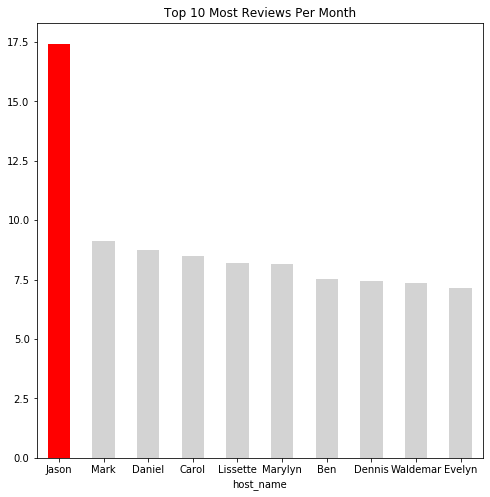

In [90]:
most_reviews.plot(kind='bar',figsize=(8, 8), rot = 0,
                  color= ["r","lightgrey","lightgrey","lightgrey","lightgrey","lightgrey","lightgrey","lightgrey","lightgrey","lightgrey"])

plt.title("Top 10 Most Reviews Per Month")
plt.ylabel("")

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Most expensive listings

Create a variable `expensive_listings_df` containing the top 100 most expensive per night listings. The most expensive should be at the top.

In [99]:
expensive_listings_df = airbnb_df.sort_values(by = "price",ascending = False).head(100)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Which neighbourhood has biggest amount of expensive listings?

Using the `expensive_listings_df` listings count the occurrences of each `neighbourhood` they belong.

In [106]:
expensive_listings_df["neighbourhood"].value_counts()

Williamsburg          9
Chelsea               9
West Village          7
East Village          7
Harlem                7
Greenpoint            7
Nolita                5
Upper West Side       5
Clinton Hill          4
Carroll Gardens       4
Upper East Side       3
Hell's Kitchen        3
Bedford-Stuyvesant    3
Midtown               3
Park Slope            2
SoHo                  2
Lower East Side       2
South Slope           2
Boerum Hill           2
Flatiron District     1
Greenwich Village     1
Gramercy              1
Flatbush              1
Ridgewood             1
Middle Village        1
Chinatown             1
Prospect Heights      1
Gowanus               1
Washington Heights    1
DUMBO                 1
Brooklyn Heights      1
Little Italy          1
Financial District    1
Name: neighbourhood, dtype: int64

#### Visualizing neighbourhoods

Text(0.5, 0, 'Amount of Listings')

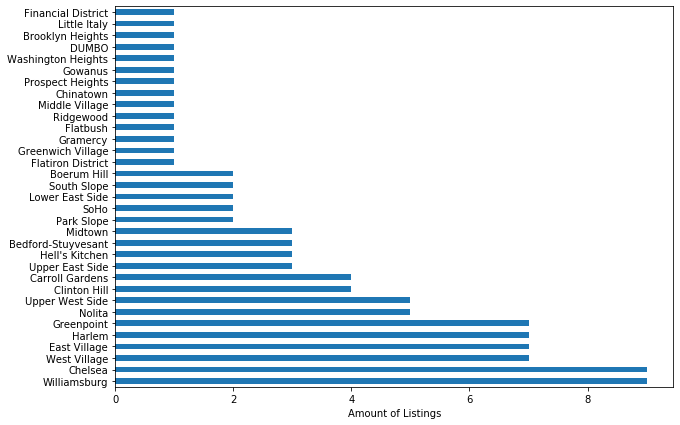

In [112]:
ax = expensive_listings_df['neighbourhood'].value_counts().plot(kind='barh', figsize=(10,7))
ax.set_xlabel("Amount of Listings")

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Which neighbourhood has the most listings?

Using all the listings from `airbnb_df` count how many listings each neighbourhood has. Keep just the top 10 neighbourhoods with the most listings.

In [113]:
airbnb_df["neighbourhood"].value_counts().head(10)

Williamsburg          110
Harlem                 74
Bedford-Stuyvesant     72
East Village           65
Upper West Side        44
Greenpoint             42
West Village           33
Crown Heights          32
Hell's Kitchen         30
Park Slope             27
Name: neighbourhood, dtype: int64

#### Visualizing neighbourhoods

Text(0.5, 0, 'Amount of Listings')

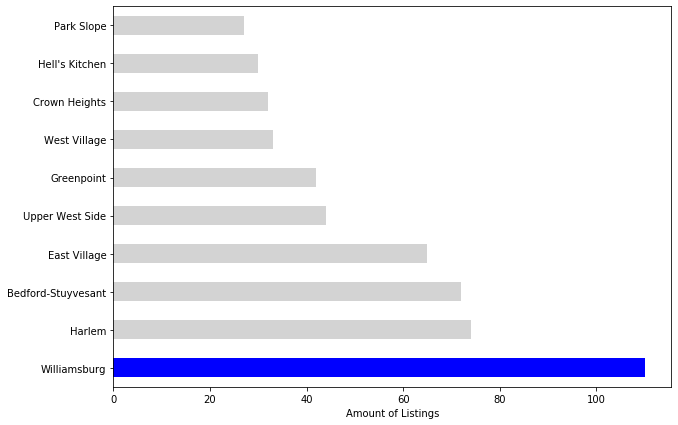

In [123]:
ax = airbnb_df['neighbourhood'].value_counts().head(10).plot(kind='barh', figsize=(10,7),rot = 0,
                                                       color = ["b","lightgrey","lightgrey","lightgrey","lightgrey","lightgrey","lightgrey","lightgrey","lightgrey","lightgrey"])
ax.set_xlabel("Amount of Listings")

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)